# CMSE 802 – Homework 2
## Wildfire Risk Detection and Simulation (Initial Development)

This project explores wildfire risk classification and simulation using historical fire incident data across the United States. The student implemented a modular, testable codebase to support data cleaning, analysis, classification, and simple simulation based on fire spread.

The cleaned dataset, derived from a SQLite database of over 1.8 million records, provides the foundation for identifying fire patterns and developing a predictive model for high-risk incidents.


## Section 1: Setup
This section imports necessary libraries, sets plot styles, and configures the notebook environment. It also adds the `src/` directory to the Python path so that custom modules can be imported.


## Project Structure

- `data/`: Raw SQLite database and cleaned CSV files
- `src/`: Modular scripts for cleaning, prediction, and simulation
- `notebooks/`: EDA and modeling notebooks
- `tests/`: Unit test(s) for validating the data cleaning pipeline
- `docs/`: Notes and structure descriptions
- `results/`: Output plots and model files

All scripts are reusable and callable via CLI or Python API.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Add src/ to Python path
sys.path.append(os.path.abspath("../src"))

from data_cleaner import load_and_clean_data

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

## Section 2: Load and Clean Data
This section uses a custom cleaning function from `data_cleaner.py` to convert the raw SQLite dataset into a cleaned DataFrame. The resulting dataset is stored in CSV format and reloaded here for inspection.


## Data Cleaning – `src/data_cleaner.py`

The data cleaning module loads the original SQLite database, filters relevant fields, converts Julian dates to standard format, and removes incomplete entries. The final output is stored as a CSV file in `data/processed/`.

Key transformations include:
- Selection of key features: year, size, cause, location
- Date conversion using pandas
- Removal of rows with missing values in core features

The module is implemented as a function and designed for reuse across different workflows.

In [4]:
cleaned_path = "../data/processed/cleaned_fires.csv"
df = load_and_clean_data("../data/raw/FPA_FOD_20170508.sqlite", cleaned_path)
df = pd.read_csv(cleaned_path)
df.head()

Cleaned data saved to ../data/processed/cleaned_fires.csv


,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2005,2005-02-02,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2004,2004-05-12,Lightning,0.25,A,38.933056,-120.404444,CA
2,2004,2004-05-31,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,2004,2004-06-28,Lightning,0.10,A,38.559167,-119.913333,CA
4,2004,2004-06-28,Lightning,0.10,A,38.559167,-119.933056,CA


## Section 3: Dataset Overview
This section provides a structural summary of the dataset, including dimensions, data types, and basic statistics.


In [5]:
print("Shape:", df.shape)
df.info()
df.describe()

Shape: (1880465, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FIRE_YEAR         int64  
 1   DISCOVERY_DATE    object 
 2   STAT_CAUSE_DESCR  object 
 3   FIRE_SIZE         float64
 4   FIRE_SIZE_CLASS   object 
 5   LATITUDE          float64
 6   LONGITUDE         float64
 7   STATE             object 
dtypes: float64(3), int64(1), object(4)
memory usage: 114.8+ MB


,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE
count,1.880465e+06,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,7.452016e+01,3.678121e+01,-9.570494e+01
std,6.663099e+00,2.497598e+03,6.139031e+00,1.671694e+01
min,1.992000e+03,1.000000e-05,1.793972e+01,-1.788026e+02
25%,1.998000e+03,1.000000e-01,3.281860e+01,-1.103635e+02
50%,2.004000e+03,1.000000e+00,3.545250e+01,-9.204304e+01
75%,2.009000e+03,3.300000e+00,4.082720e+01,-8.229760e+01
max,2.015000e+03,6.069450e+05,7.033060e+01,-6.525694e+01


## Section 4: Missing Values
A check for missing values is performed to assess data quality.

In [6]:
missing = df.isnull().sum()
print("\nMissing Values:\n", missing[missing > 0])


Missing Values:
 Series([], dtype: int64)


## Section 5: Distribution Analysis
The following plots reveal insights about fire size, fire size class, and causes of wildfires. Distributions are visualized using histograms and bar plots.


### Fire Size Distribution

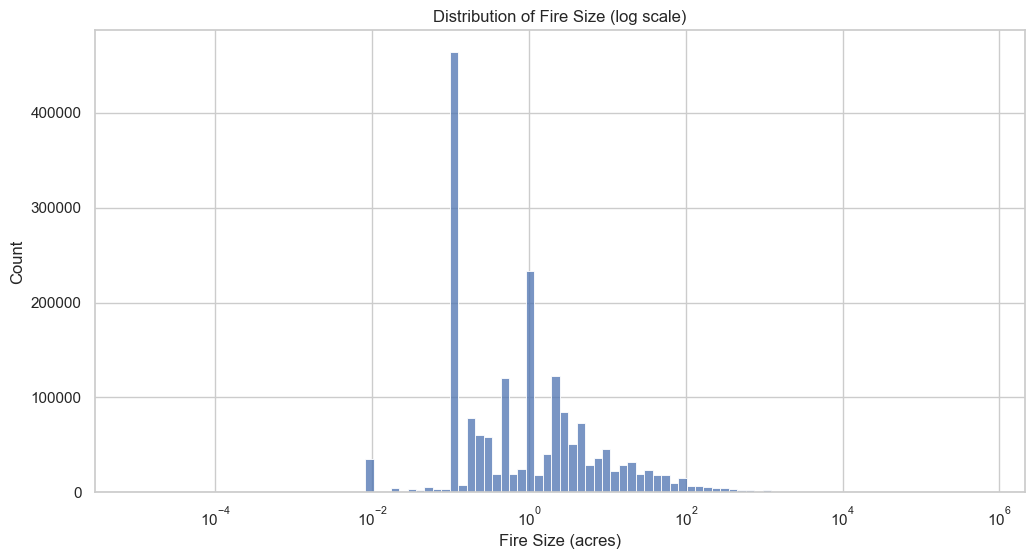

In [7]:
sns.histplot(df['FIRE_SIZE'], bins=100, log_scale=True)
plt.title("Distribution of Fire Size (log scale)")
plt.xlabel("Fire Size (acres)")
plt.ylabel("Count")
plt.show()

### Fire Size Class Count

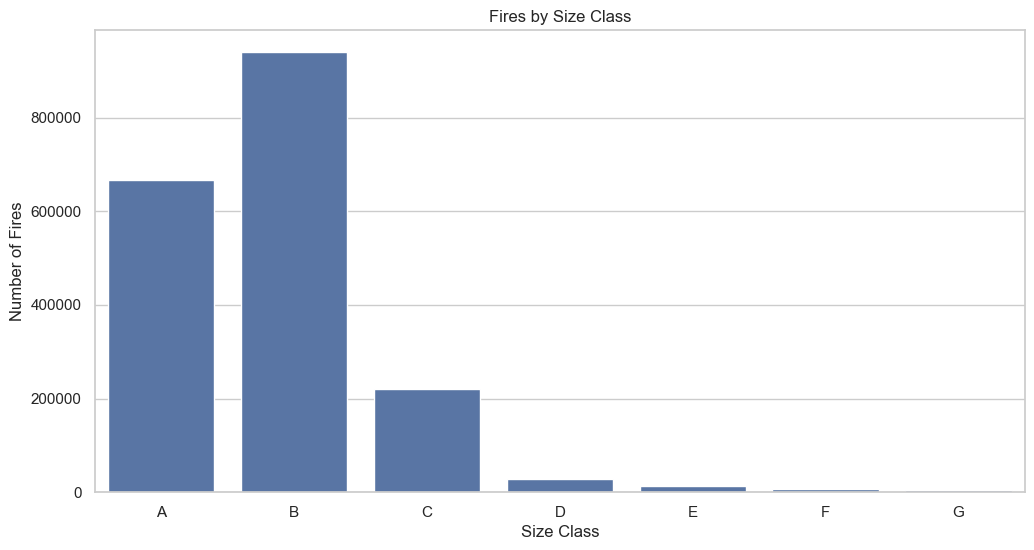

In [8]:
sns.countplot(data=df, x='FIRE_SIZE_CLASS', order=sorted(df['FIRE_SIZE_CLASS'].unique()))
plt.title("Fires by Size Class")
plt.xlabel("Size Class")
plt.ylabel("Number of Fires")
plt.show()

### Fire Causes

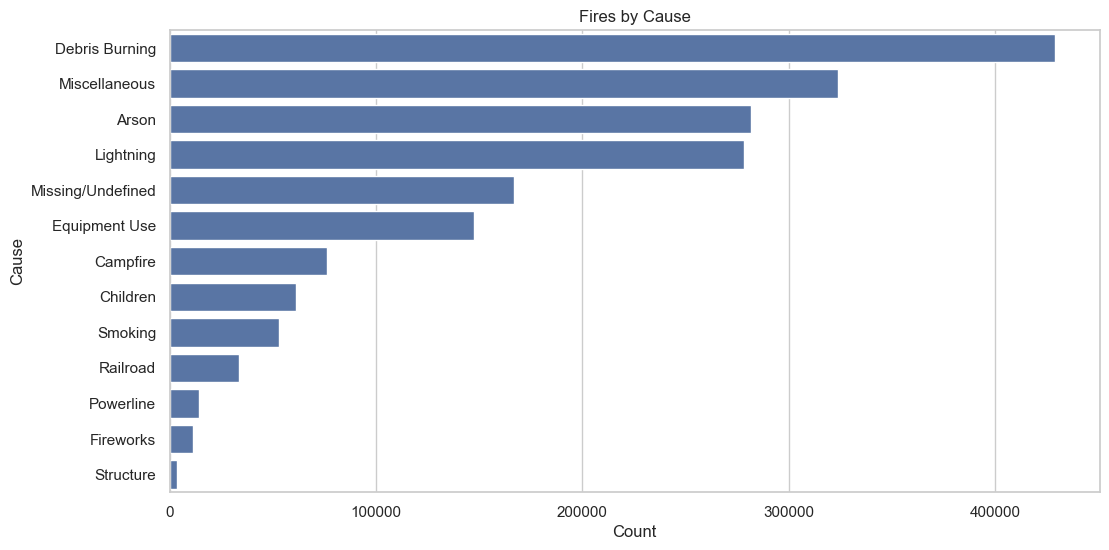

In [9]:
sns.countplot(data=df, y='STAT_CAUSE_DESCR', order=df['STAT_CAUSE_DESCR'].value_counts().index)
plt.title("Fires by Cause")
plt.xlabel("Count")
plt.ylabel("Cause")
plt.show()

## Section 6: Temporal & Spatial Analysis
This section includes a trend analysis of fires per year and a scatter plot showing geographical distribution.


### Fires Per Year

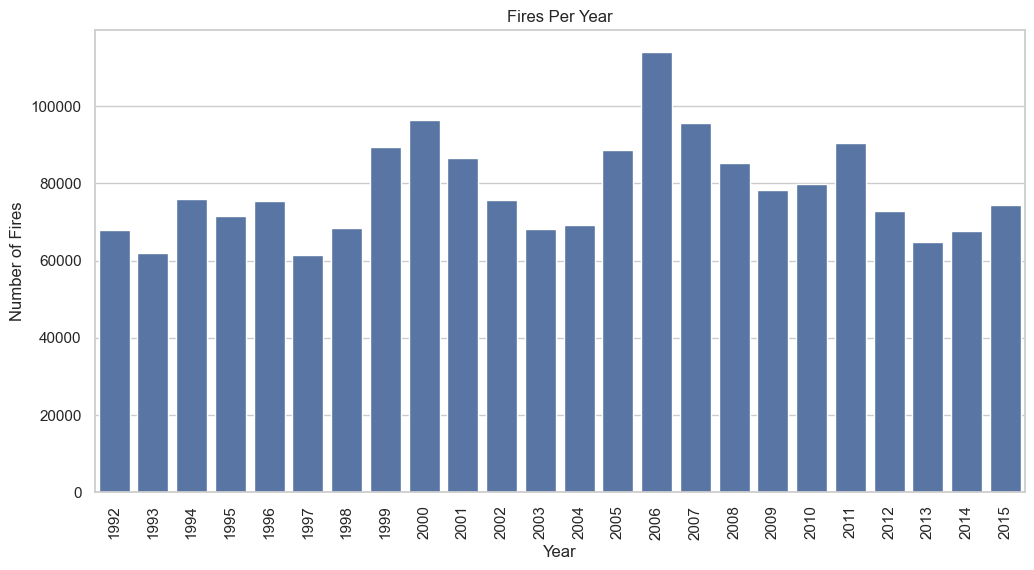

In [10]:
sns.countplot(data=df, x='FIRE_YEAR')
plt.xticks(rotation=90)
plt.title("Fires Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.show()

### Geospatial Distribution

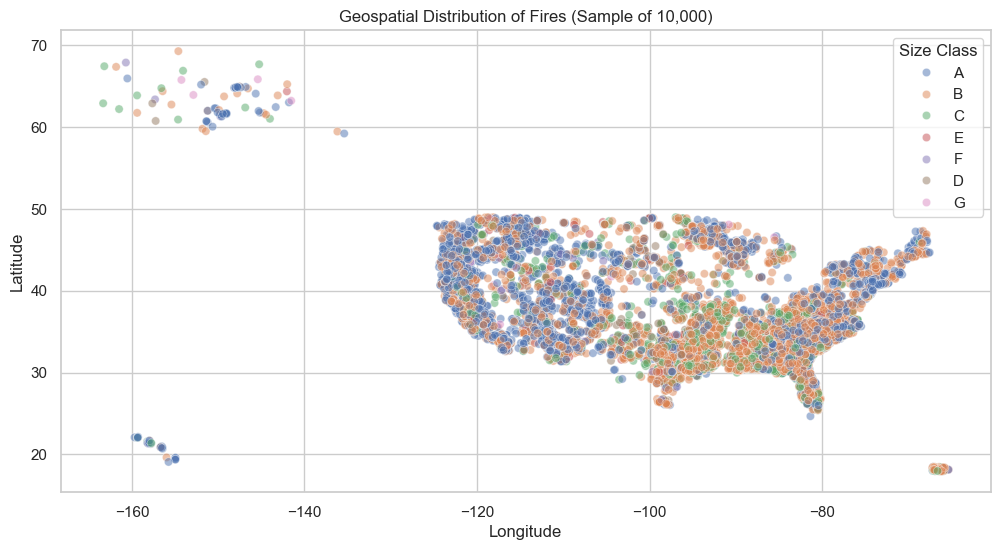

In [11]:
sample_df = df.sample(10000)
sns.scatterplot(data=sample_df, x='LONGITUDE', y='LATITUDE', hue='FIRE_SIZE_CLASS', alpha=0.5)
plt.title("Geospatial Distribution of Fires (Sample of 10,000)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Size Class")
plt.show()

## Exploratory Data Analysis
Exploratory analysis was performed on the cleaned dataset using Pandas, Seaborn, and Matplotlib.

### Key Observations:
- Fire size follows a heavily skewed distribution, warranting log-scale visualizations
- The majority of fires fall into size classes A–C (smaller than 100 acres)
- Lightning, campfires, and debris burning are among the top reported causes
- Spatial distribution of fire locations indicates clustering in western states such as California
- Fire occurrence spans from 1992 to 2015, with some year-to-year variability

Charts included:
- Histogram of fire sizes
- Count plots of fire causes and size classes
- Scatter plot of fire locations
- Yearly trend of incident frequency


## Section 7: Unit Test Verification
This section documents the existence of a unit test designed to verify the structure of the cleaned dataset.

A test script located in `tests/test_cleaner.py` checks whether all expected columns are present in the output CSV. The test uses the `unittest` framework.


In [13]:
import unittest

# Import the test case directly or define it here
class TestCleaner(unittest.TestCase):
    def test_columns_exist(self):
        df_test = pd.read_csv("../data/processed/cleaned_fires.csv")
        expected_cols = ['FIRE_YEAR', 'DISCOVERY_DATE', 'STAT_CAUSE_DESCR',
                         'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE']
        for col in expected_cols:
            self.assertIn(col, df_test.columns)

# Create a test suite and run it (safe for notebooks)
suite = unittest.TestLoader().loadTestsFromTestCase(TestCleaner)
unittest.TextTestRunner(verbosity=2).run(suite)


test_columns_exist (__main__.TestCleaner.test_columns_exist) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.901s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

## Section 8: Risk Classification Summary
### Fire Risk Classification – `src/risk_predictor.py`

A binary classification model was constructed using a Random Forest classifier to identify high-risk fires (defined as those exceeding 100 acres in size). The model was trained on a 100,000-record sample of the cleaned dataset.

**Features used:**
- `FIRE_YEAR`
- `LATITUDE`
- `LONGITUDE`

**Target variable:**
- `RISK_LEVEL`, defined as 1 if `FIRE_SIZE > 100`, else 0

While the model achieved high overall accuracy, recall for the high-risk class was low due to class imbalance. The pipeline is designed to be extended with additional features (e.g., cause of fire, state, size class).


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create target variable
df['RISK_LEVEL'] = df['FIRE_SIZE'].apply(lambda x: 1 if x > 100 else 0)
features = df[['FIRE_YEAR', 'LATITUDE', 'LONGITUDE']]
labels = df['RISK_LEVEL']

# Train-test split (sample for performance)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    366230
           1       0.39      0.10      0.15      9863

    accuracy                           0.97    376093
   macro avg       0.68      0.55      0.57    376093
weighted avg       0.96      0.97      0.96    376093



## Section 9: Observations & Insights
- Fire sizes are highly skewed, justifying log-scaled visualizations.
- The majority of wildfires fall under size classes A to C (small fires).
- Lightning is the most common cause, followed by human-related factors such as debris burning.
- Fire activity is more concentrated in the western United States.
- Temporal spread from 1992–2015 shows variability in annual fire counts.

These insights will inform future classification models and help in parameterizing simulation models.

# HW2 Progress Summary

Implemented a wildfire risk analysis project with the following components:
- Cleaned and processed wildfire data from an SQLite file (~1.8 million rows)
- Developed modular scripts for data loading, modeling, and simulation
- Created an EDA notebook with visuals of fire size, cause, time, and geography
- Built a Random Forest classifier to predict high-risk fires
- Wrote a unit test to validate the cleaner output
